## 필요 패키지 불러오기

In [18]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.image as img
import pandas as pd

In [19]:
# 파일 읽기

slam_dir = '.\\shape4.shp'
slam_map = gpd.read_file(slam_dir)
slam_map.head()

,label,X,Y,geometry
0,Starbucks,594,540,POINT (594.000 540.000)
1,Vans,586,489,POINT (586.000 489.000)
2,Buberry,587,424,POINT (587.000 424.000)
3,Gucci,594,362,POINT (594.000 362.000)
4,AT_T,595,304,POINT (595.000 304.000)


In [20]:
# 매장 이름 변경 

slam_map[slam_map['label'][26]] = 'CM'
slam_map[slam_map['label'][27]] = 'YKCandle'
slam_map[slam_map['label'][4]] = 'AT&T'
slam_map[slam_map['label'][19]] = 'H&M'
slam_map[slam_map['label'][6]]= "Hat's On"
slam_map[slam_map['label'][9]] = "BodyShop"

In [21]:
# 매장 전체 이름 컬럼 생성
slam_map['StoreName'] = pd.Series(['Starbucks', 'Vans','Buberry','Gucci','AT&T','Chanel',"Hat's On",'Guess','Victoria Secret','The Body Shop',
                                  'Brooks Brothers','Zara','Van Hart','Starfield Hanam','Lacoste','Hollys Coffee','Converse','Fendi','Hermes','H & M','ALDO','Polo Ralph Lauren','Club Monaco',
                                  'Kiz Dom','Cartier','Chicor','Custom Mellow','Yankee Candle','Tommy Hilfiger', 'GS25'])

## 슬램 이미지 불러오기

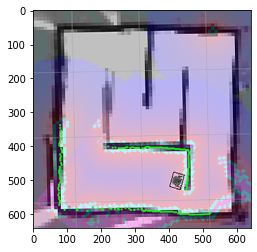

In [22]:
fileName = '.\\slam_map1.png'
ndarray = img.imread(fileName)
plt.imshow(ndarray)
plt.show()

## shapefile과 슬램 이미지 결합

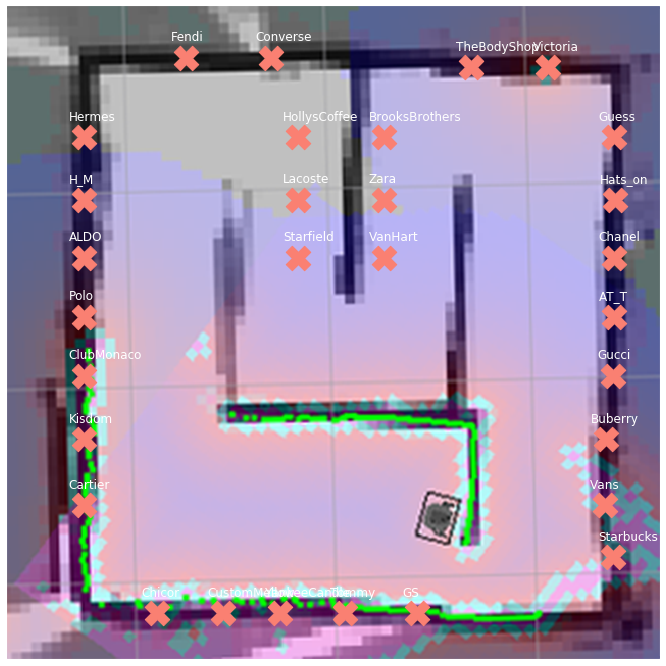

In [23]:
# plot으로 그려보기
ax = slam_map.convex_hull.plot(color = 'salmon', figsize=(16,12), marker = "X", markersize = 600)
ax.invert_yaxis()

# 변화 전 후 매장 이름 저장
before_store = None
after_store = None

# 그래프 작성

for x in range(len(slam_map.label)) :
    # 변화 전 후 라벨 이름이 들어온다면 빨간 색으로 표시
    if slam_map['label'][x] == before_store :
        ax.annotate(after_store, (slam_map['X'][x]-15, slam_map['Y'][x]-17), color = 'red', fontsize = 16, weight = 'bold')
    # 아니면 전체 하얀색 폰트로 표시
    else :
        ax.annotate(slam_map['label'][x], (slam_map['X'][x]-15, slam_map['Y'][x]-17), color = 'white', fontsize = 12, #weight = 'bold'
                   )

# ax.set_title('Store Map Before', fontsize = 40,)
ax.set_axis_off()
fileName = '.\\slam_map1.png'
ndarray = img.imread(fileName)
plt.imshow(ndarray)
plt.show()